This is a short example script to showcase part of the diffpy.srreal package.
It uses the PDFCalculator to calculate a pair distribution function for a
CdS wurtzite crystal from a known crystal structure.

In [1]:
from diffpy.Structure import loadStructure
from diffpy.srreal.pdfcalculator import PDFCalculator
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


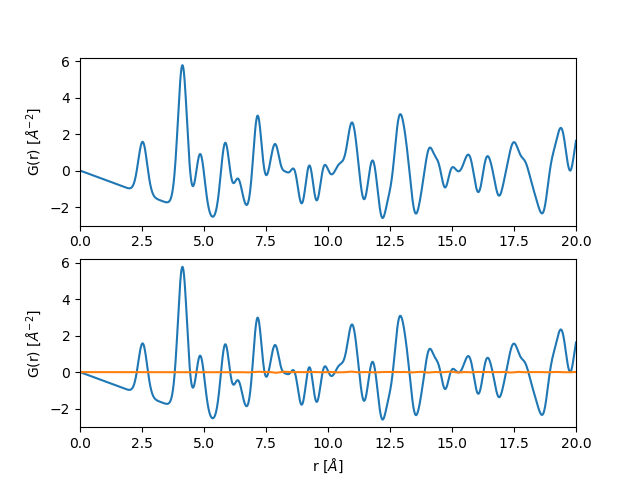

In [3]:

cds = loadStructure('CdS_wurtzite.cif')
pc1 = PDFCalculator()

pc1.rmax = 20

pc1.scatteringfactortable.setCustomAs('S2-', 'S', 18)
pc1.scatteringfactortable.lookup('S2-')

plt.figure()
ax1=plt.subplot(211)

r1, g1 = pc1(cds)
plt.plot(r1, g1)

pc2 = pc1.copy()
cds2 = loadStructure('CdS_wurtzite.cif')

cds2.anisotropy = False

r2, g2 = pc2(cds2)
plt.ylabel('G(r) [$\AA^{-2}$]')

plt.subplot(212,sharex=ax1)

plt.plot(r2, g2)
plt.plot(r1, g1-g2)

plt.xlabel('r [$\AA$]')
plt.ylabel('G(r) [$\AA^{-2}$]')

plt.xlim(r1.min(),r1.max());